NAME : KELVIN CHRISTOBER

ROLL NO : 215229120

# Lab7: Loan Approval Classification Using SVM

### Step1: Understanding Data

In [1]:
import pandas as pd
df=pd.read_csv('train_loan.csv')

In [2]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [8]:
df.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP002337,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


### Step2:Data cleaning

In [9]:
df['Dependents'].dtype

dtype('O')

In [10]:
df['Dependents']=df['Dependents'].astype(str)

In [11]:
df['Dependents'].dtype

dtype('O')

In [12]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)

In [14]:
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Education'].fillna(df['Education'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

In [15]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
df['Gender']

0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
609    Female
610      Male
611      Male
612      Male
613    Female
Name: Gender, Length: 614, dtype: object

In [17]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)

In [18]:
df.drop(['Loan_ID'],axis =1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


### STEP - 3 : [ OPTIONAL: EXPLORATORY DATA ANALYSIS - WHO GOT THEIR LOAN APPROVED ]

### DRAW COUNT PLOT FOR [ MARRIED, DEPENDANTS, GRADUATES, SELF_EMPLOYED

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

### COUNT PLOT FOR MARRIED

<AxesSubplot:xlabel='Married', ylabel='count'>

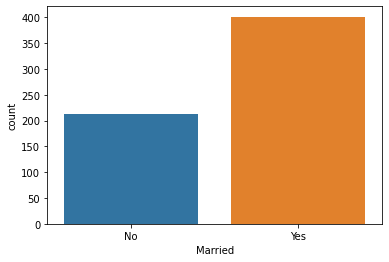

In [20]:
sns.countplot (x = 'Married', data =df)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

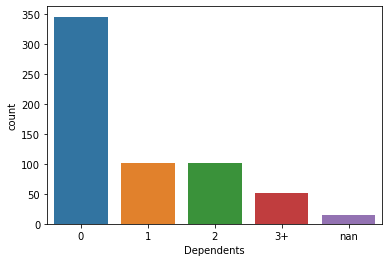

In [21]:
sns.countplot (x = 'Dependents', data =df)

<AxesSubplot:xlabel='Education', ylabel='count'>

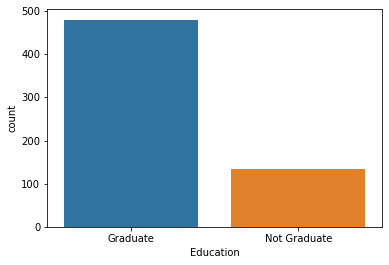

In [22]:
sns.countplot (x = 'Education', data =df)

### COUNT PLOT FOR SELF_EMPLOYED

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

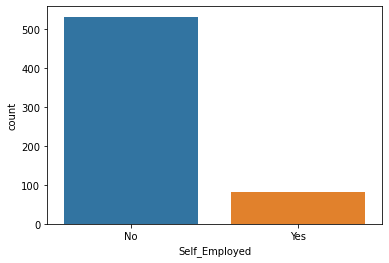

In [23]:
sns.countplot (x = 'Self_Employed', data =df)

### STEP - 4 : EXTRACT X AND Y

In [24]:
X = df.drop(['Loan_Status'],axis =1)
y = df.pop('Loan_Status')

### STEP - 5 : [ONE HOT ENCODING ]

In [25]:
X = pd.get_dummies(X)

### STEP - 6 : MODEL BUILDING

#### SPLIT X AND Y FOR TRAINING AND TESTING

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state=42)

### USING STANDARD SCALER , FIT_TRANSFORM ON X_TRAIN AND TRANSFORM ON X_TEST

In [27]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [28]:
X_train_ss=ss.fit_transform(X_train)
X_train_ss

array([[-0.50133384,  0.27865737,  0.40368493, ..., -0.62317695,
        -0.79056942,  1.40682858],
       [-0.42803179,  0.45103751,  0.09632945, ...,  1.60468065,
        -0.79056942, -0.71081865],
       [-0.5669725 ,  0.23208844, -0.15191921, ..., -0.62317695,
         1.26491106, -0.71081865],
       ...,
       [-0.37088951, -0.59751445, -1.38134113, ..., -0.62317695,
        -0.79056942,  1.40682858],
       [ 0.76362634, -0.59751445, -0.00519051, ..., -0.62317695,
         1.26491106, -0.71081865],
       [ 1.36387019, -0.59751445, -0.00519051, ..., -0.62317695,
        -0.79056942,  1.40682858]])

In [29]:
X_test_ss=ss.transform(X_test)
X_test_ss

array([[ 0.60302821, -0.59751445,  0.95928907, ..., -0.62317695,
         1.26491106, -0.71081865],
       [-0.19213246, -0.59751445, -0.19920467, ..., -0.62317695,
         1.26491106, -0.71081865],
       [-0.21595563, -0.05408512,  0.13179354, ...,  1.60468065,
        -0.79056942, -0.71081865],
       ...,
       [ 1.04850477, -0.59751445,  0.47461312, ..., -0.62317695,
        -0.79056942,  1.40682858],
       [-0.39787799,  0.30982851, -0.09281238, ...,  1.60468065,
        -0.79056942, -0.71081865],
       [ 0.00611627, -0.59751445, -0.49473878, ...,  1.60468065,
        -0.79056942, -0.71081865]])

In [30]:
from sklearn.svm import LinearSVC
LinSVC = LinearSVC()
LinSVC.fit(X_train_ss, y_train)
LinSVC_y_pred = LinSVC.predict(X_test_ss)

In [31]:
LinSVC_y_pred

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

### PRINT ACCURACY VALUE

In [32]:
from sklearn.metrics import accuracy_score
LinSVC_acc = accuracy_score(y_test, LinSVC_y_pred)
LinSVC_acc

0.745945945945946

### PRINT CONFUSION MATRIX BETWEEN Y_TEST AND Y_PRED

In [33]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, LinSVC_y_pred)
cf_matrix

array([[ 20,  45],
       [  2, 118]], dtype=int64)

### PRINT CLASSIFICATION_REPORT

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, LinSVC_y_pred, labels=['Y','N']))

              precision    recall  f1-score   support

           Y       0.72      0.98      0.83       120
           N       0.91      0.31      0.46        65

    accuracy                           0.75       185
   macro avg       0.82      0.65      0.65       185
weighted avg       0.79      0.75      0.70       185



### STEP - 7 [PERFORMANCE COMPARISONS]

### COMPARE THE PERFORMANCE OF LINEARSVC AGAINST LOGISTIC REGRESSION

In [35]:
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
LOR = LogisticRegression()
LOR.fit(X_train_ss, y_train)
LOR_y_pred = LOR.predict(X_test_ss)
# LINEARSVC
from sklearn.svm import LinearSVC
LinSVC = LinearSVC()
LinSVC.fit(X_train_ss, y_train)
LinSVC_y_pred = LinSVC.predict(X_test_ss)

# ACCURACY OF LOGISTIC REGRESSION
from sklearn.metrics import accuracy_score
LOR_acc = accuracy_score(y_test, LOR_y_pred)
print('Accuracy of Logistic Regression : ',LOR_acc)

#ACCURACY OF LINEAR SVC
from sklearn.metrics import accuracy_score
LinSVC_acc = accuracy_score(y_test, LinSVC_y_pred)
print('Accuracy of Linear SVC : ',LinSVC_acc)

Accuracy of Logistic Regression :  0.7513513513513513
Accuracy of Linear SVC :  0.745945945945946
